# Project: No-show appointment Dataset.
## Table of contents
<ul>
    <li><a href = "#intro">Introduction</a></li>
    <li><a href = "Question">Question for analysis</a></li>
    <li><a href = "#wrangling">Data Wrangling</a></li>
    <li><a href = "#Exploration">Exploratory Data Analysis</a></li>
    <li><a href = "#Conclusions">Conclusions</a></li>
     <li><a href = "#Ref">References</a></li>
</ul>

<a id='intro'></a>
## Introduction

For my first project,I have chosen the No-show appointment dataset.This dataset contains information from more than 100k medical appointments in brazil and is centered on the question of whether or not patients show up for their appointment.This dataset contains the following variables:
- Patient Id
- Appointment id
- Scheduledd day
- Appointment day
- Age
- Neighbourhood
- Scholarship
- Hipertension
- Diabetes
- Alcoholism
- Handcap
- SMS_received
- No-show
</ul>

<a id='Question'></a>
## Question for Analysis.
1. How many patients were able to receive the SMS and showed up?
1. Which gender showed up or never showed up the most.
1. Can the age distribution be used to determine if a patient will show up or not

<a id='wrangling'></a>
## Data Wrangling

In [1]:
## importing the necessary libraries for this project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [9]:
## importing my csv dataset into this jupyter notebook
## lets name our dataframe as df_appointment
df_appointment = pd.read_csv('KaggleV2-May-2016.csv')
df_appointment.head()## this outputs the first five rows of our dataset

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


### General Inspections

In [10]:
## to determine how many rows and columns are in our dataset
df_appointment.shape

(110527, 14)

In [11]:
## Generate summary statistics for each column
df_appointment.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [12]:
## To identify the data type for each column
df_appointment.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

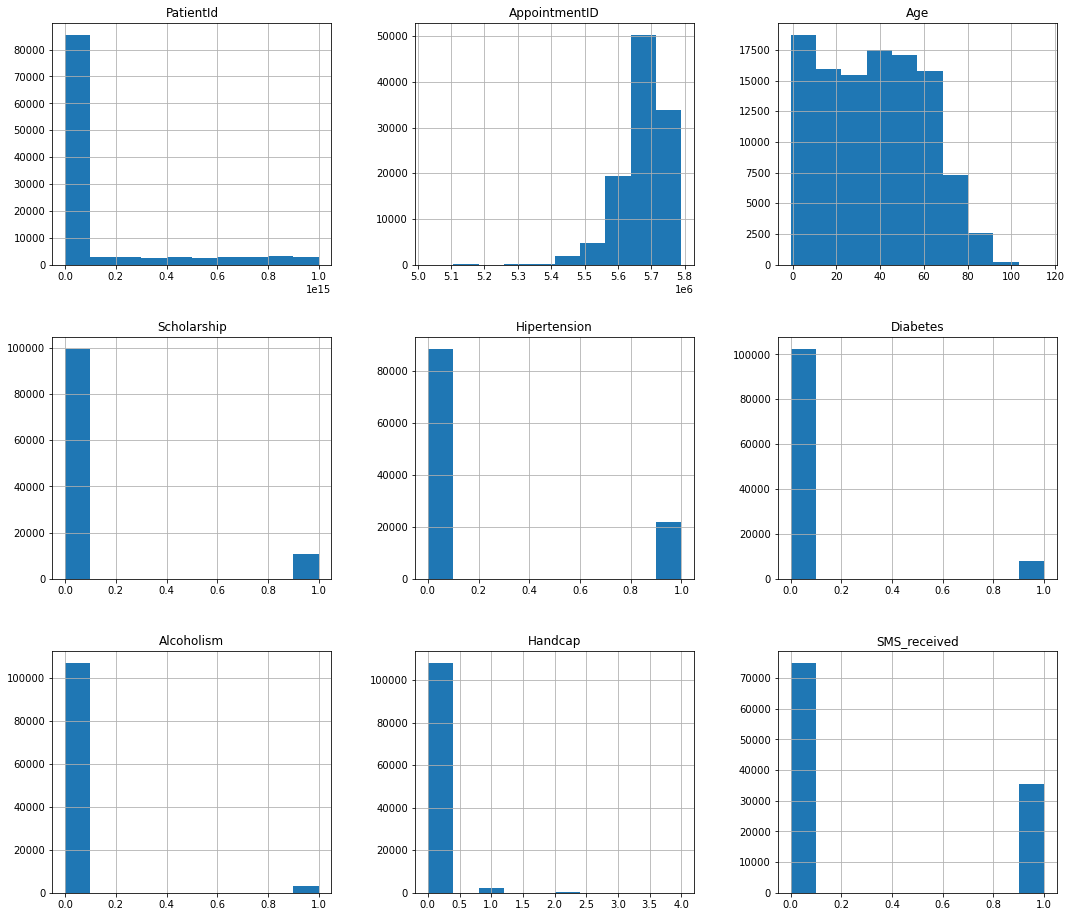

In [13]:
## lets see the distribution of our variables using hist()
df_appointment.hist(figsize=(18,16));

## Report:
- Age: There are many young patients in our dataset but from 65years old we also see that there also old patients.
- Scholarship :Many patients were not on scholarship.
- Hipertension:Many patients are not suffering from hipertension though we also have quite a number suffering from it.
- Diabetes: There are less patients suffering from diabetes.
- Alcoholisim : Many patients do not consume alcohol.
- Handcap: We have very few handcap patients.
- SMS_received: many patients were not able to receive the messages as compared to those who received it.

### Data Cleaning

In [14]:
## This helps us check if there is any missing values in our dataset
df_appointment.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

### Report: There are no missing values

In [15]:
## Checking for any duplicates
df_appointment.duplicated().sum()

0

### Report: There are no duplicates in our dataset

In [16]:
# Renaming No-show to No_show
df_appointment.rename(columns={'No-show':'No_show'},inplace=True)

In [17]:
for col in df_appointment.columns:
    print(col)

PatientId
AppointmentID
Gender
ScheduledDay
AppointmentDay
Age
Neighbourhood
Scholarship
Hipertension
Diabetes
Alcoholism
Handcap
SMS_received
No_show


<a id='Exploration'></a>
## Exploratory Data Analysis 
> In this section we are going to explore our data in order to find the answers to our question.

### How many patients were able to receive the SMS and showed up?

In [18]:
df_appointment.groupby(['SMS_received','No_show'])['PatientId'].count()

SMS_received  No_show
0             No         62510
              Yes        12535
1             No         25698
              Yes         9784
Name: PatientId, dtype: int64

### Report: 
- Patients who didnot receive the sms but showed up are 62,510.
- Patients who didnot receive the sms and never showed up are 12535.
- Patients who did receive the sms and showed up are 25698.
- Patients who did receive the sms but never showed up are 9784.

In [19]:
# defining show and noshow
show=df_appointment.No_show=="No"
noshow=df_appointment.No_show=="Yes"

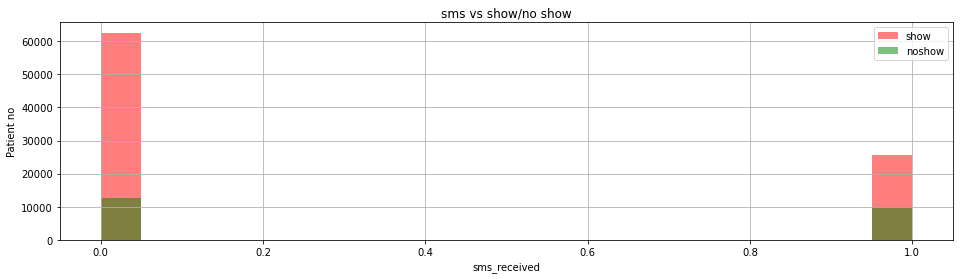

In [20]:
# does receiving sms determines show /no show of a patient?
def showingup(df_appointment,col_name,showedup,nevershowedup):
    plt.figure(figsize=[16,4])
    df_appointment[col_name][show].hist(alpha=0.5,bins=20,color='red',label='show');
    df_appointment[col_name][noshow].hist(alpha=0.5,bins=20,color='green',label='noshow');
    plt.legend();
    plt.title('sms vs show/no show')
    plt.xlabel('sms_received')
    plt.ylabel('Patient no');
showingup(df_appointment,'SMS_received',show,noshow)

### Report:  
- From the bar graph above we see that most patients did show up for their appointment even though they did not receive the SMS.We also see that,those patients who received the SMS and fail to show up are few compared to those who received the sms and showed up.
- 32% of the patients received the sms while 68% did not receive the sms.From those who received the sms we see that 72% showed up and for those who didnot receive the sms but showed up are 83%.

### Which gender showed up or never showed up the most.

In [21]:
## the number of females and males who booked an appointment
df_appointment['Gender'].value_counts()

F    71840
M    38687
Name: Gender, dtype: int64

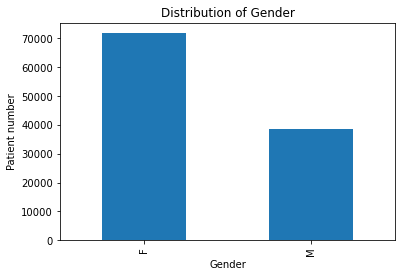

In [22]:
## lets see the distribution of females and males who booked the appointment.
df_appointment['Gender'].value_counts().plot(kind='bar')
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Patient number');

#### From the distribution above we see that there are more female patients than men.

In [23]:
gender_analysis = ['Gender','SMS_received','No_show']

In [24]:
## checking which gender did or didnot receive the sms and showed or never showed up.
df_appointment[gender_analysis].value_counts()

Gender  SMS_received  No_show
F       0             No         39764
M       0             No         22746
F       1             No         17482
M       1             No          8216
F       0             Yes         7874
        1             Yes         6720
M       0             Yes         4661
        1             Yes         3064
dtype: int64

#### Report:
- 39764 females didnot receive the sms but showed up.17482 received the sms and also showed up.7874 didnot receive the sms and never showedup while 6720 females received the sms but never showedup.
- 22746 males didnot receive the sms but showed up.8216 received the sms and also showed up.4661 didnot receive the sms and never showedup while 3064 males received the sms but never showedup.


In [25]:
df_1 = df_appointment[gender_analysis]


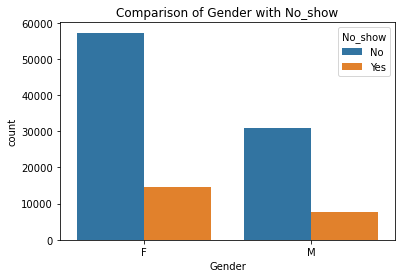

In [26]:
## showing distribution of age using our new dataframe
sns.countplot(x ='Gender', hue = "No_show", data = df_1).set(title='Comparison of Gender with No_show');

#### From the plot above,we see that the number of both males and females who showed up for their appointment is higher than the number of both genders who failed to showup

C:\Users\user\Documents\THE ANACONDA\ANACONDA\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


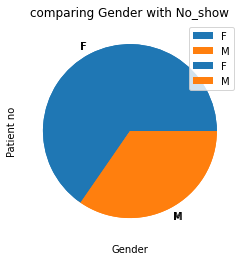

In [27]:
def showingup(df_appointment,col_name,showedup,nevershowedup):
    plt.figure(figsize=[14,4])
    df_appointment[col_name][show].value_counts(normalize=True).plot(kind='pie',label='noshow')
    df_appointment[col_name][noshow].value_counts(normalize=True).plot(kind='pie',label='noshow')
    plt.legend();
    plt.title('comparing Gender with No_show')
    plt.xlabel('Gender')
    plt.ylabel('Patient no');
showingup(df_appointment,'Gender',show,noshow)

##### The above pier chart does not show us the difference between the genders in terms of which showed up or not.Thus we will have to separate them.

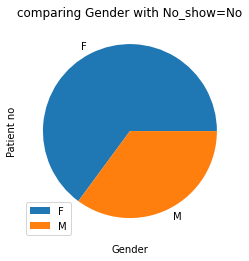

In [28]:
## plotting a pie chart showing which gender showed up in large numbers.
def showingup(df_appointment,col_name,showedup,nevershowedup):
    plt.figure(figsize=[14,4])
    df_appointment[col_name][show].value_counts(normalize=True).plot(kind='pie',label='noshow')
    plt.legend();
    plt.title('comparing Gender with No_show=No')
    plt.xlabel('Gender')
    plt.ylabel('Patient no');
showingup(df_appointment,'Gender',show,noshow)

#### Females showed up the most.

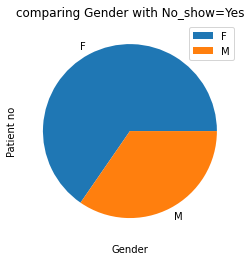

In [29]:
## Pie chart showing which gender registered a high number of No_show=Yes
def showingup(df_appointment,col_name,showedup,nevershowedup):
    plt.figure(figsize=[14,4])
    df_appointment[col_name][noshow].value_counts(normalize=True).plot(kind='pie',label='noshow')
    plt.legend();
    plt.title('comparing Gender with No_show=Yes')
    plt.xlabel('Gender')
    plt.ylabel('Patient no');
showingup(df_appointment,'Gender',show,noshow)

#### From the above piechart we see that more females were not able to show up than men.

## Report:
From the pie chart above we see that females are the one who showed up the most.
Out of 71840 females who booked for an appointment, 57246 showed up.That is 80% ofthe female were able to show up.
Out of 38687 males who booked the appointment,30962 showed up.That is 80% of the male were able to show up.
From the above findings we see that 20% of both males and females failed to show up.

### Can the age distribution be used to determine if a patient will show up or not 

In [30]:
df_appointment.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


### Report:
from the command above, we see that on average we have 37 year old patients.25% of the patients are 18 years and below and 75% are 55 years and below.There are also old people who have more than 100years.

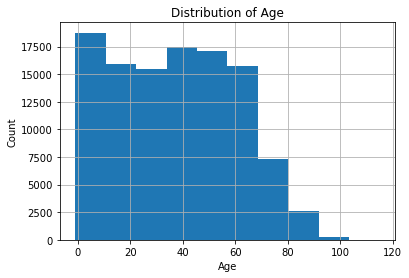

In [31]:
#lets see the age distribution using a histogram
df_appointment['Age'].hist()
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count');

#### from the plot above, we see that we have many young people and also we have very old people that is from age 90 to 115. On average our plot is evenly distributed.

In [32]:
## grouping my data with age and no-show.
df_appointment.groupby(['Age','No_show']).count()

PatientId  AppointmentID  Gender  ScheduledDay  AppointmentDay  \
Age  No_show                                                                   
-1   No               1              1       1             1               1   
 0   No            2900           2900    2900          2900            2900   
     Yes            639            639     639           639             639   
 1   No            1858           1858    1858          1858            1858   
     Yes            415            415     415           415             415   
...                 ...            ...     ...           ...             ...   
 99  No               1              1       1             1               1   
 100 No               4              4       4             4               4   
 102 No               2              2       2             2               2   
 115 No               2              2       2             2               2   
     Yes              3              3       3             3               3   

              Neighbourhood  Scholarship  Hipertension  Diabetes  Alcoholism  \
Age  No_show                                                                   
-1   No                   1            1             1         1           1   
 0   No                2900         2900          2900      2900        2900   
     Yes                639          639           639       639         639   
 1   No                1858         1858          1858      1858        1858   
     Yes                415          415           415       415         415   
...                     ...          ...           ...       ...         ...   
 99  No                   1            1             1         1           1   
 100 No                   4            4             4         4           4   
 102 No                   2            2             2         2           2   
 115 No                   2            2             2         2           2   
     Yes                  3            3             3         3           3   

              Handcap  SMS_received  
Age  No_show                         
-1   No             1             1  
 0   No          2900          2900  
     Yes          639           639  
 1   No          1858          1858  
     Yes          415           415  
...               ...           ...  
 99  No             1             1  
 100 No             4             4  
 102 No             2             2  
 115 No             2             2  
     Yes            3             3  

[204 rows x 12 columns]

In [33]:
## Extracting these three columns
age_analysis = ['Age','SMS_received','No_show']

In [34]:
df_2 = df_appointment[age_analysis]

In [35]:
## to check the age which were able to showup/noshowup and how many received sms.
df_2.groupby(['Age','No_show']).count()

SMS_received
Age  No_show              
-1   No                  1
 0   No               2900
     Yes               639
 1   No               1858
     Yes               415
...                    ...
 99  No                  1
 100 No                  4
 102 No                  2
 115 No                  2
     Yes                 3

[204 rows x 1 columns]

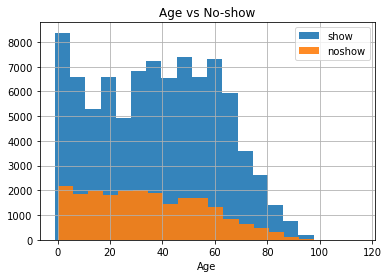

In [94]:
## Checking the comparison using histogram.
df_appointment.Age[show].hist(alpha=0.9,bins=20,label='show');
df_appointment.Age[noshow].hist(alpha=0.9,bins=20,label='noshow');
plt.legend()
plt.title('Age vs No-show')
plt.xlabel('Age')
plt.show()          

#### Infants show up the most.We also see that most young people aged 0 to 62  were able to show up.From age 1 to 60,we see that the number of patients who failed to showup is high.

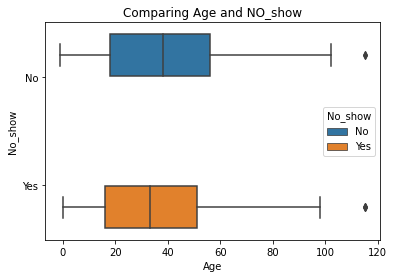

In [96]:
## Plotting using boxplot to see the distribution of Age with No_show
sns.boxplot(x='Age',y='No_show',hue='No_show',data=df_2).set(title='Comparing Age and NO_show');

#### On average most patients(both young and old) were able to show up.
- The median age of patients who showed up is 40 and median age of patients who failed to show is 35.
- Our box plot is positively skewed.

## Report:
- Infacts register a high number of patients who showed up.
- Most young patients were able to show up than old patients.we also see that the rate at which young patients fail to show up compared to that of old patients is high.

<a id='Conclusions'></a>
## Conclusions.
I have gone through my dataset and was able to solve few problems associated with it. I investigated the independent variables with the dependent variables and made some observations.
These observations are:
- From the data 75,045 patients did not receive the sms while 35,482 did receive sms.Out of 75,045 patients,62510 were able to show up and 12535 failed to show up.Out of 35482 patients 25,698 showed up while 9784 failed to show up. 
- Thus on average, 83% of the patients who did not receive the sms were able to show up and 72% of those patients who received the sms showed up.
- Out of 71840 females who booked for an appointment, 57246 showed up.That is 80% ofthe female were able to show up.Out of 38687 males who booked the appointment,30962 showed up.That is 80% of the male were able to show up.
- From the these findings we see that 20% of both males and females failed to show up.We also see that more females booked the appointment than men.
- In the Age distribution, we see that on average we have 37 year old patients.25% of the patients are 18 years and below and 75% are 55 years and below.There are also old people who have more than 100years.The age is evenly distributed.
- Most young patients showed up for their appointment compared to older patients and also they failed to show up more than the older people.
- We can also conclude that our dataset has many young patients though we also have the elderly who are more than 100years.
- Most of the patients are not alcoholics.
- most patients are suffering from diabetes than hipertension.
- Very few patients are handcapped.
- from the entire patient population,that is from 110527 patients,88208 showedup while 22,319 failed to show up.
- On average,80% of the patients showed up while 20% failed to show up.

## Limitations.
- The neighbourhood column in our dataset should be given in terms of distance between the patient home and the location of the hospital,so that we see if the distance is one of the causes that make them fail to show

<a id='Ref'></a>
## References.
1. https://youtu.be/tse_8LLWtfY
1. https://github.com/ksatola/Medical-Appointments-No-Shows